# OpenStreetMap City Analysis

## Load and normalize collected OSM Counts

In [3]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('data/city_amenities_counts.csv')

df_pop = df['population']

mask = (df['country'] == 'Germany') | (df['country'] == 'France')
df_subset = df[mask]
df_pop_subset = df_pop[mask]

# Select subset with amenities
X = df_subset.loc[:, 'parking':'veterinary']
# Replace every 0 value with 0.1
X = X.applymap(lambda x: float(0.1 if x == 0 else x))
# Normalize values with population
X_normalized = X.apply(lambda row: row / df_pop_subset[row.name], axis=1)

y = df_subset['country'].map({'Germany':0, 'France':1})

X.head()

,parking,place_of_worship,school,bench,restaurant,fuel,cafe,fast_food,bank,waste_basket,...,waste_disposal,marketplace,bus_station,university,college,parking_entrance,swimming_pool,theatre,taxi,veterinary
12,7188.0,693.0,1163.0,8836.0,4062.0,328.0,2145.0,2098.0,443.0,2655.0,...,84.0,65.0,7.0,97.0,81.0,218.0,1.0,178.0,379.0,96.0
13,6380.0,426.0,626.0,3635.0,1839.0,235.0,810.0,860.0,357.0,584.0,...,67.0,40.0,13.0,86.0,12.0,319.0,0.1,79.0,146.0,69.0
14,3928.0,368.0,441.0,4906.0,1850.0,143.0,715.0,685.0,320.0,1660.0,...,31.0,33.0,4.0,95.0,19.0,737.0,29.0,59.0,189.0,59.0
15,2875.0,447.0,407.0,2024.0,1125.0,146.0,456.0,496.0,219.0,1107.0,...,14.0,23.0,3.0,85.0,23.0,235.0,0.1,48.0,103.0,27.0
16,1385.0,259.0,228.0,977.0,1128.0,79.0,348.0,332.0,167.0,263.0,...,28.0,10.0,3.0,65.0,6.0,141.0,0.1,36.0,56.0,11.0


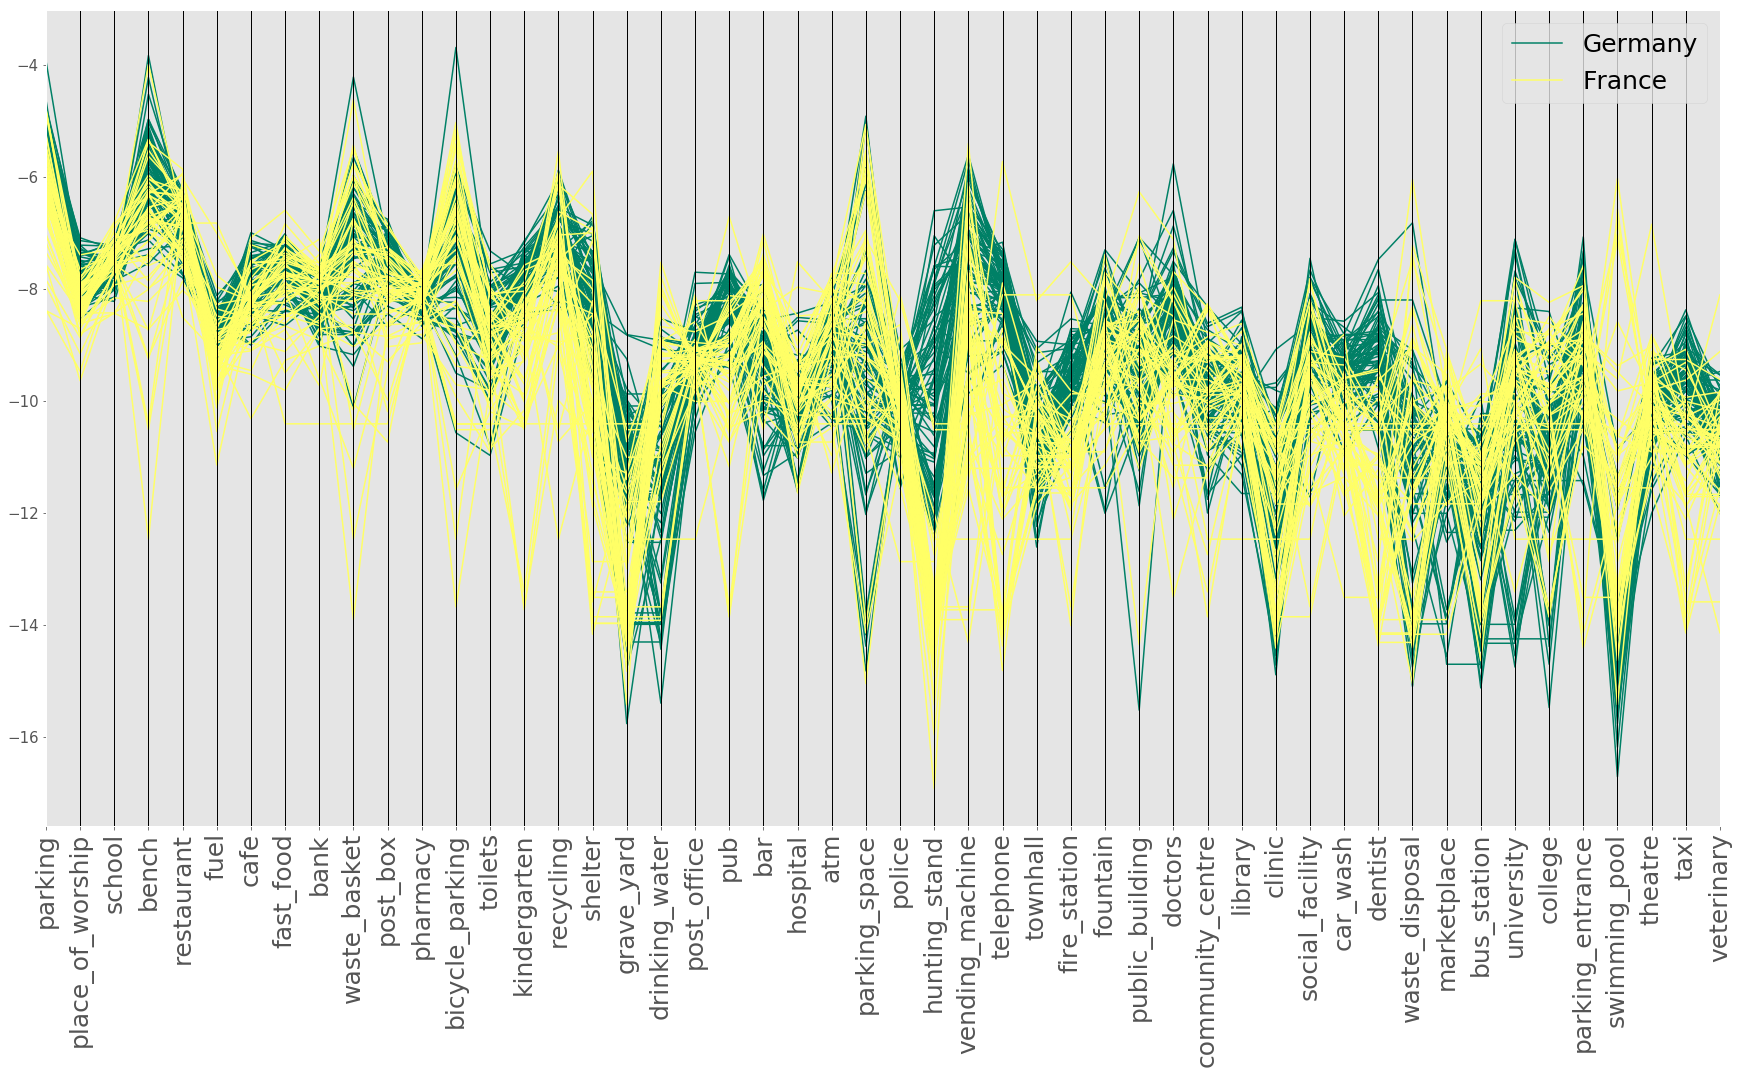

In [4]:
from pandas.plotting import parallel_coordinates

df_plot = pd.concat([X_normalized.applymap(np.log), df_subset['country']], axis=1)

plt.figure(figsize=(30, 15))
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=15)
parallel_coordinates(df_plot, 'country', colormap='summer');
plt.legend(fontsize=25);

## Curiosities within the Data Set

In [5]:
df[['city', 'parking_space']].sort_values(by='parking_space', ascending=False).iloc[:10]

,city,parking_space
2,Linz,18916
93,Paris,1753
36,Gelsenkirchen,1686
95,Lyon,1436
71,Wolfsburg,895
34,Karlsruhe,827
80,Recklinghausen,746
131,Nancy,667
102,Lille,577
136,Avignon,541


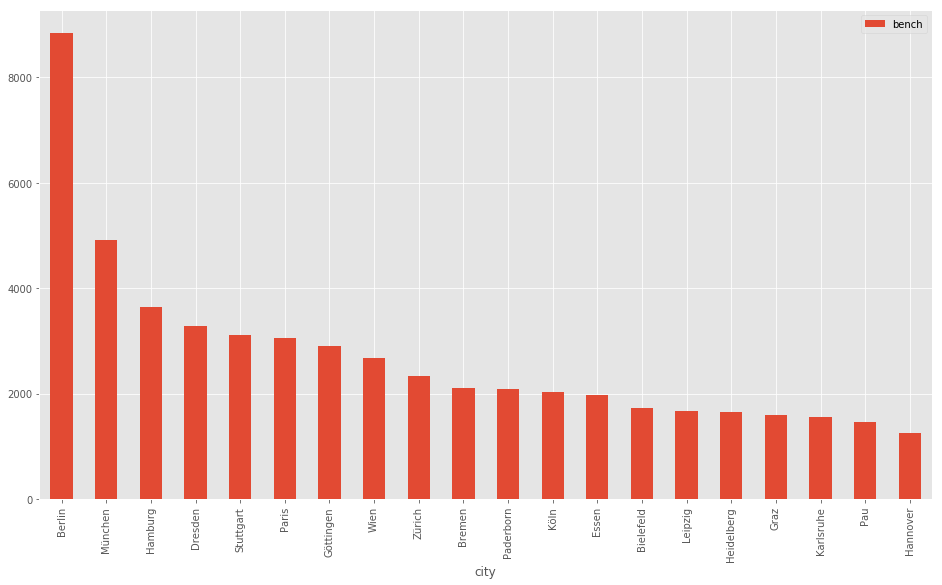

In [10]:
df_plot = df[['city', 'bench']].set_index('city')
df_plot.sort_values(by='bench').iloc[::-1].iloc[:20].plot(kind='bar', figsize=(16, 9));

In [11]:
X.describe()

,parking,place_of_worship,school,bench,restaurant,fuel,cafe,fast_food,bank,waste_basket,...,waste_disposal,marketplace,bus_station,university,college,parking_entrance,swimming_pool,theatre,taxi,veterinary
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,902.703704,85.437037,128.022222,714.017037,324.925926,36.103704,112.674074,139.548889,71.637778,260.151111,...,12.625185,7.178519,2.343704,21.023704,10.160000,44.849630,8.891111,14.742222,21.037037,7.862222
std,1004.983605,92.599088,149.183272,1059.002860,650.095029,40.229616,247.732970,234.601878,96.744196,393.279125,...,31.015039,12.000438,2.498794,30.788596,19.495637,91.261352,68.417612,28.344371,44.105869,12.363909
min,8.000000,1.000000,2.000000,0.100000,4.000000,2.000000,1.000000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
25%,332.000000,36.500000,57.500000,162.000000,107.500000,16.500000,27.500000,46.000000,32.000000,54.000000,...,0.550000,2.000000,1.000000,3.000000,2.000000,8.500000,0.100000,4.000000,3.000000,3.000000
50%,659.000000,59.000000,85.000000,377.000000,175.000000,24.000000,53.000000,83.000000,49.000000,135.000000,...,3.000000,4.000000,2.000000,8.000000,5.000000,19.000000,0.100000,7.000000,7.000000,5.000000
75%,1093.500000,98.500000,143.500000,866.000000,273.500000,39.000000,102.000000,142.500000,71.500000,279.500000,...,8.000000,8.000000,3.000000,21.000000,12.500000,42.500000,1.000000,14.000000,19.000000,8.000000
max,7188.000000,693.000000,1163.000000,8836.000000,5933.000000,328.000000,2145.000000,2098.000000,929.000000,2655.000000,...,262.000000,104.000000,18.000000,139.000000,193.000000,737.000000,777.000000,246.000000,379.000000,96.000000


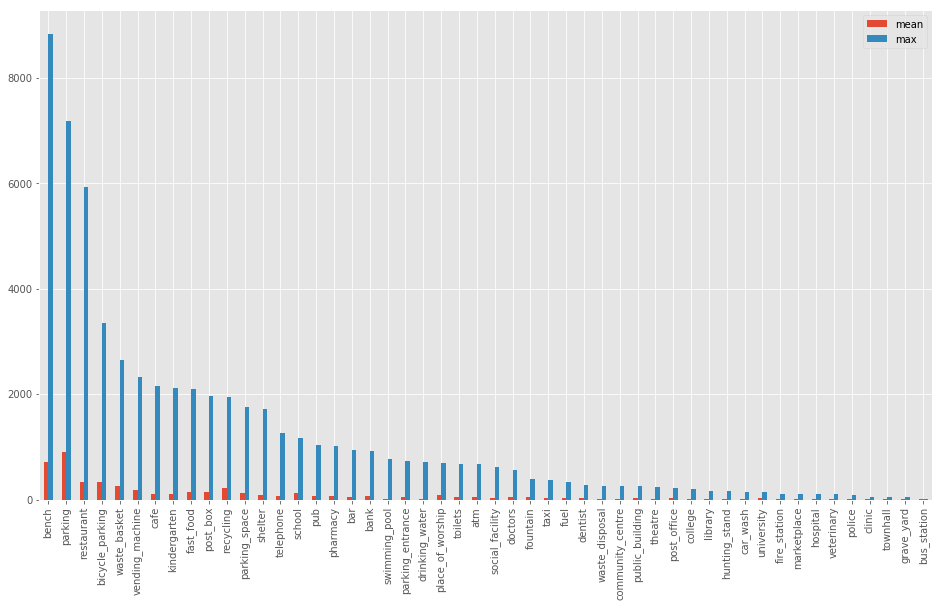

In [12]:
X.describe().loc[['mean', 'max']].T.sort_values(by='max')[::-1].plot(kind='bar', figsize=(16, 9));

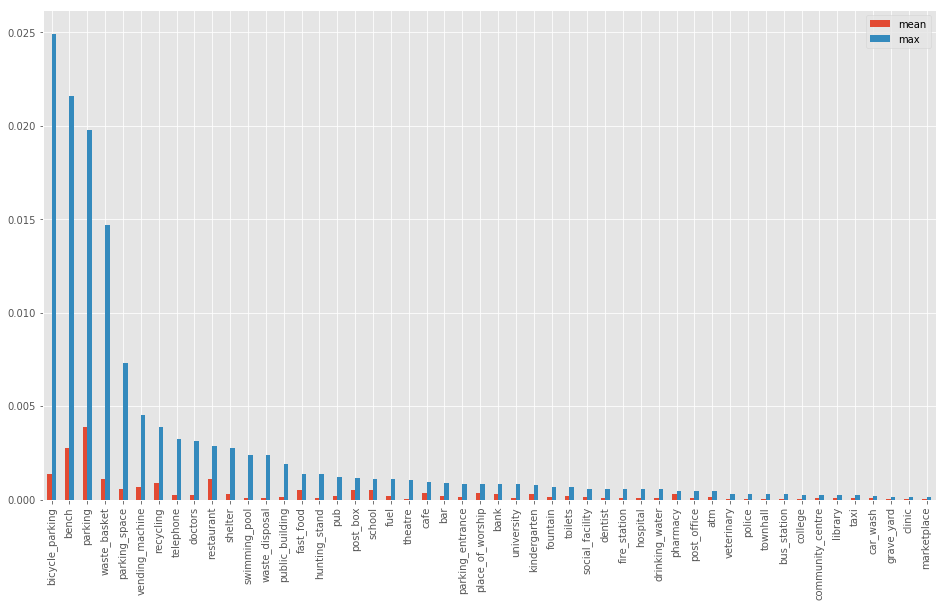

In [13]:
X_normalized.describe().loc[['mean', 'max']].T.sort_values(by='max')[::-1].plot(kind='bar', figsize=(16, 9));

# Prediction with Gaussian Naive Bayes Classifier

- [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=4)

clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf)

y_expect = y_test
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_expect, y_pred))

GaussianNB(priors=None)
0.9777777777777777


# Prediction with Random Forest Classifier

- [Ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html)
- [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [16]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.33, random_state=10)

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
print(clf)

y_expect = y_test
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_expect, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9777777777777777


# Cross Validation
- [Cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html)
- [sklearn.model_selection.StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- [sklearn.model_selection.LeaveOneOut](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
- [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [18]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

clf = GaussianNB()
scores = cross_val_score(clf, X_normalized, y, cv=LeaveOneOut(), scoring='accuracy')
print(scores.mean())

0.9703703703703703


In [19]:
cross_val_score(clf, np.array(X_normalized), np.array(y), cv=10, scoring='roc_auc').mean()

0.9879166666666667

# PCA Dimensionality Reduction

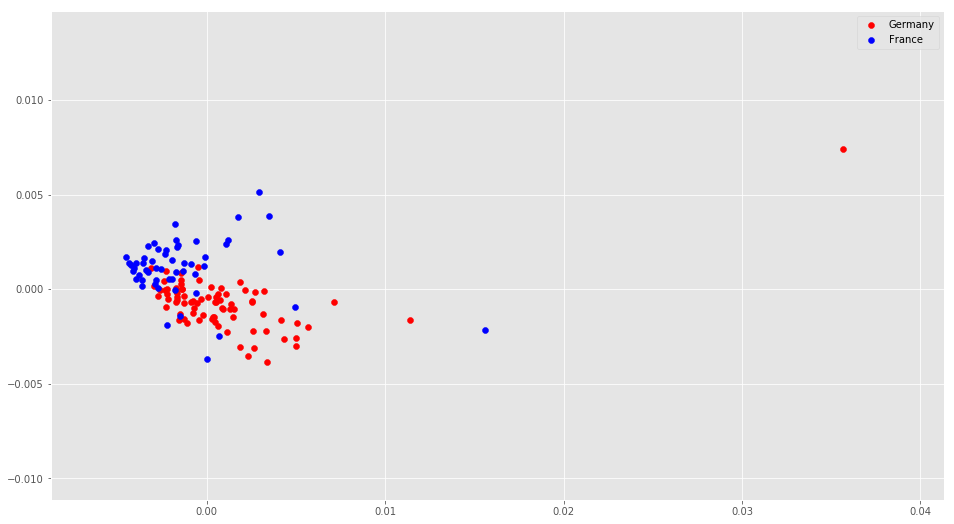

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.figure(figsize=(16, 9))
plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], c='r', label='Germany')
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], c='b', label='France')
plt.legend();

# T-SNE Dimensionality Reduction

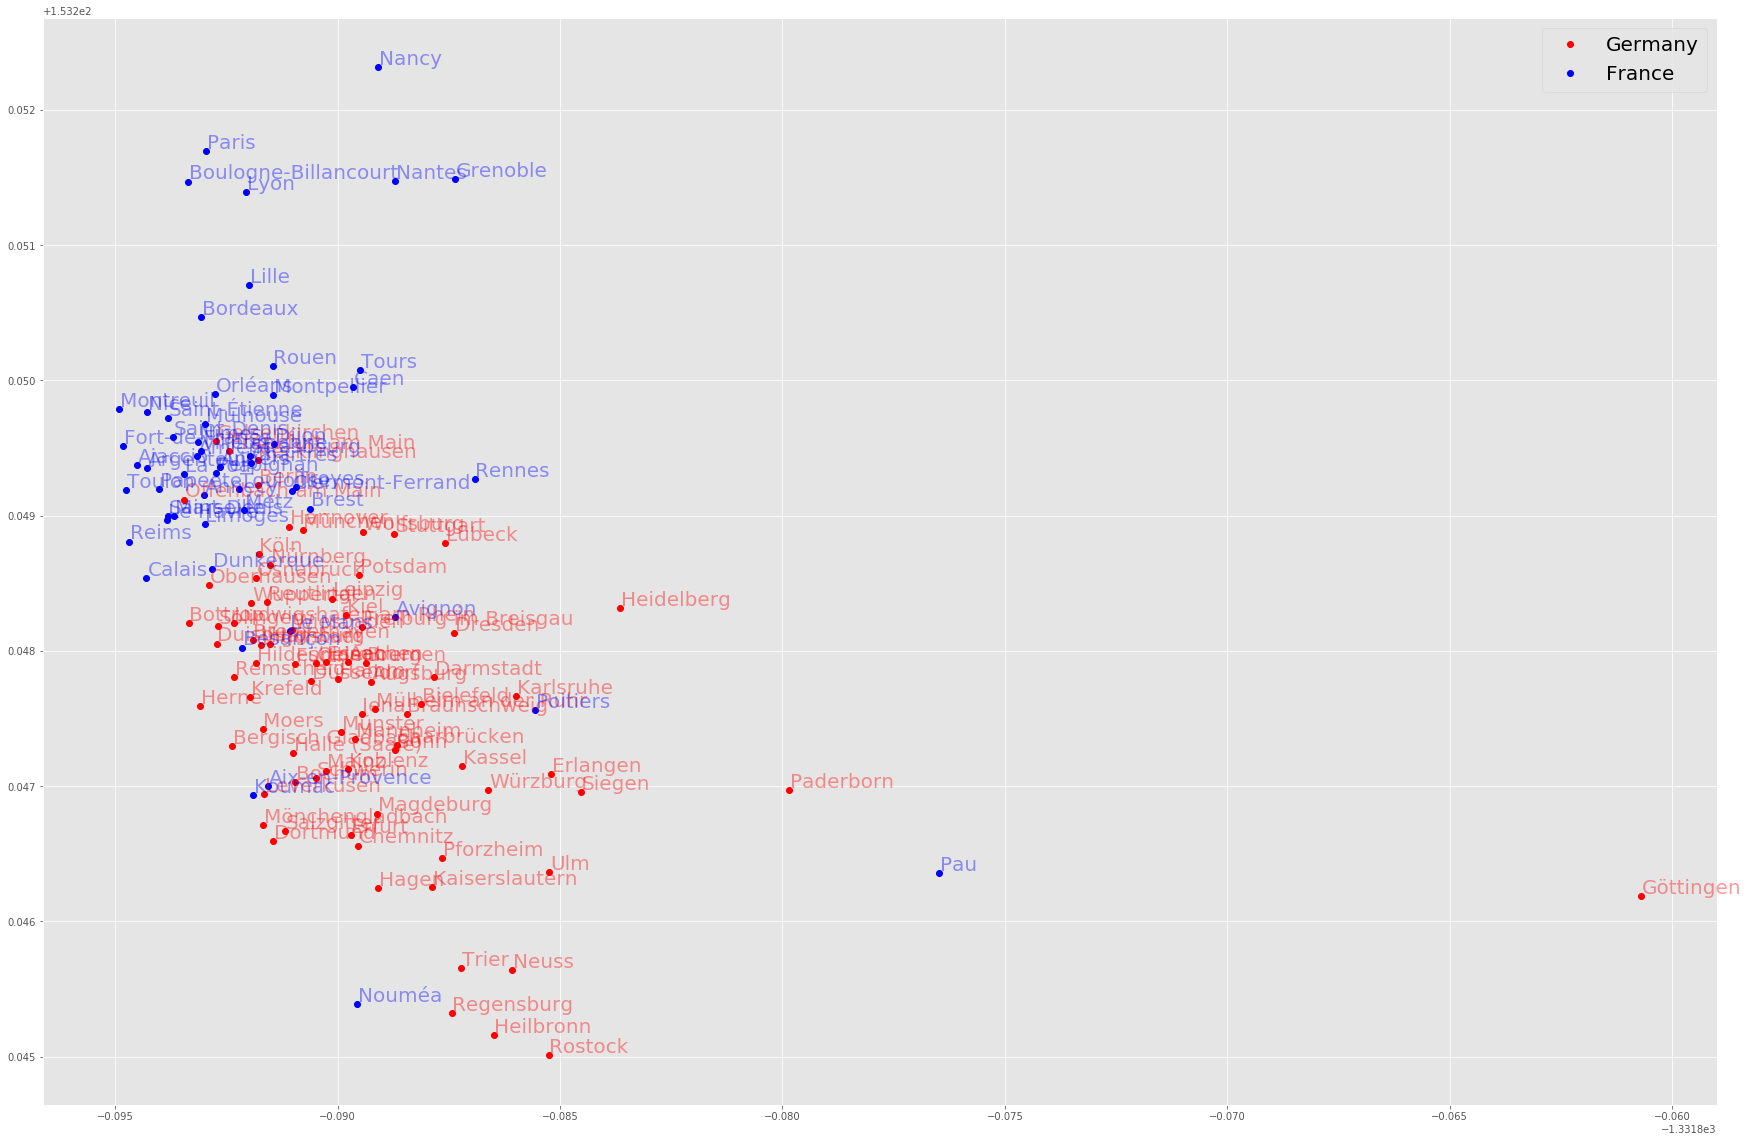

In [25]:
from sklearn.manifold import TSNE

df_pop = df['population']

mask = (df['country'] == 'Germany') | (df['country'] == 'France')
df_subset = df[mask]
df_pop_subset = df_pop[mask]

# Select subset with amenities
X = df_subset.loc[:, 'parking':'veterinary']
# Replace every 0 value with 0.1
X = X.applymap(lambda x: float(0.1 if x == 0 else x))
# Normalize values with population
X_normalized = X.apply(lambda row: row / df_pop_subset[row.name], axis=1)

y = df_subset['country'].map({'Germany':0, 'France':1})

pca = PCA(n_components=2)
pca.fit(X)
X_embedded = pca.transform(X_normalized.values)

#tsne = TSNE(n_components=2, learning_rate=1000, perplexity=8)
#X_embedded = tsne.fit_transform(X_normalized.values)

#fig, ax = plt.subplots(figsize=(30, 20))
plt.figure(figsize=(30, 20))
plt.plot(X_embedded[y == 0][:, 0], X_embedded[y == 0][:, 1], 'ro', label='Germany')
plt.plot(X_embedded[y == 1][:, 0], X_embedded[y == 1][:, 1], 'bo', label='France')
#ax.set_title('T-SNE of Amenity Distribution', fontsize=20)
plt.legend(fontsize=20);

for i, country_idx in enumerate(df_subset.index):
    country = df.iloc[country_idx]['city']
    color = 'r' if y.iloc[i] == 0 else 'b'
    plt.annotate(country, (X_embedded[i, 0] + 0.00002, X_embedded[i, 1] + 0.00002), fontsize=20, alpha=0.4, color=color)